In [79]:
#supress warning 
import warnings
warnings.filterwarnings('ignore')



import pandas as pd
import numpy as np
import os 
from matplotlib import pyplot as plt
os.getcwd()

#change the default number of rows to be displayed
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 92000)
pd.set_option('max_info_columns', 91713)

In [40]:
# how to know use rb to open file?
df_A_Test = pd.read_excel(open('Babson Hackathon _ Exhibits.xlsx','rb'), sheet_name = 'Exhibit A | Test Results',head=True)
df_B_Content = pd.read_excel(open('Babson Hackathon _ Exhibits.xlsx', 'rb'), sheet_name='Exhibit B | Content Type Defini')  
df_ContentRecomm = pd.read_csv('ContentRecommendationData.csv')
df_ModuleCount = pd.read_csv('ModuleCountData .csv')
df_Supplier = pd.read_csv('SupplierData.csv')

In [25]:
df_Supplier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9358854 entries, 0 to 9358853
Data columns (total 20 columns):
prsku               object
soid                int64
soname              object
clid                int64
clname              object
mkcname             object
suid                int64
iswaymore           int64
addedtocart         int64
placedorder         int64
trafficcount        int64
iscurrent           int64
videocount          int64
grs1month           float64
grs2month           float64
grs3month           float64
grs12month          float64
weightedavgscore    float64
percentilerank      float64
expectedgrs         float64
dtypes: float64(7), int64(9), object(4)
memory usage: 1.4+ GB


In [115]:
#list all categorical variables in df_Supplier
category = ['soid', 'clid', 'suid']

#recast types
for col in category:
    df_Supplier[col] = df_Supplier[col].astype('category')
df_Supplier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9358854 entries, 0 to 9358853
Data columns (total 20 columns):
prsku               object
soid                category
soname              object
clid                category
clname              object
mkcname             object
suid                category
iswaymore           int64
addedtocart         int64
placedorder         int64
trafficcount        int64
iscurrent           object
videocount          int64
grs1month           float64
grs2month           float64
grs3month           float64
grs12month          float64
weightedavgscore    float64
percentilerank      float64
expectedgrs         float64
dtypes: category(3), float64(7), int64(5), object(5)
memory usage: 1.2+ GB


In [30]:
df_A_Test.head(10)

,clid,clname,biccontenttypename,Conversion Rate Change,clmkcid,mkcname
0,6,TV Stands & Entertainment Centers,Materials / How Its Made,0.03,7,Entertainment Furniture
1,6,TV Stands & Entertainment Centers,Product Capacity,-0.01,7,Entertainment Furniture
2,6,TV Stands & Entertainment Centers,Relative Size & Fit,0.05,7,Entertainment Furniture
3,6,TV Stands & Entertainment Centers,Visual Details,0.02,7,Entertainment Furniture
4,12,Beds,Compatibility & Adjustability,0.05,61,Furniture - Bedroom
5,12,Beds,Dimensions,0.05,61,Furniture - Bedroom
6,12,Beds,Materials / How Its Made,0.07,61,Furniture - Bedroom
7,12,Beds,Product Feature,0.01,61,Furniture - Bedroom
8,13,Dressers & Chests,Assembly & Installation,-0.01,61,Furniture - Bedroom
9,13,Dressers & Chests,Dimensions,0.02,61,Furniture - Bedroom


In [31]:
df_A_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 6 columns):
clid                      192 non-null int64
clname                    192 non-null object
biccontenttypename        192 non-null object
Conversion Rate Change    192 non-null float64
clmkcid                   192 non-null int64
mkcname                   192 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 9.1+ KB


In [36]:
'''
Depend on different content, there are different
conversion rate change in each class
'''
df_A_Test.sort_values(by=['Conversion Rate Change','clid'], ascending=False)

,clid,clname,biccontenttypename,Conversion Rate Change,clmkcid,mkcname
139,1337,Mantels,Visual Details,0.07,8,Fireplaces & Grills
124,1175,Cat Litter Boxes & Litter Box Enclosures,Cleaning & Care,0.07,23,Pet
110,1009,Smokers,Product Feature,0.07,8,Fireplaces & Grills
93,590,Tubs And Whirlpools,Product Feature,0.07,24,Plumbing - Core
81,371,Cribs,Product Feature,0.07,32,Nursery
78,327,Outdoor Fireplaces,Relative Size & Fit,0.07,8,Fireplaces & Grills
62,230,Ceiling Fans,Product Feature,0.07,15,Lighting
55,157,Accent Chests / Cabinets,Visual Details,0.07,116,Accent Furniture
37,118,Patio Sofas,Dimensions,0.07,22,Outdoor
28,56,Kitchen Islands,Dimensions,0.07,62,Furniture - Kitchen and Dining


In [43]:
df_ContentRecomm.head(10)

,prsku,clid,percentilerank,biccontenttypename,hasbiccontenttype
0,AACF1003,15,NaN,Materials / How Its Made,0
1,AACF1020,15,NaN,Warranty & Guarantees,0
2,AACF1025,15,NaN,Materials / How Its Made,0
3,AACF1042,15,NaN,Relative Size & Fit,0
4,AACF1057,15,NaN,Materials / How Its Made,0
5,AACF1057,15,NaN,Relative Size & Fit,0
6,AACF1111,15,NaN,Warranty & Guarantees,0
7,AACF1122,15,NaN,Cleaning & Care,0
8,AACF1123,15,NaN,Relative Size & Fit,0
9,AACF1215,15,NaN,Relative Size & Fit,0


In [41]:
df_ContentRecomm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7652996 entries, 0 to 7652995
Data columns (total 5 columns):
prsku                 object
clid                  int64
percentilerank        float64
biccontenttypename    object
hasbiccontenttype     int64
dtypes: float64(1), int64(2), object(2)
memory usage: 291.9+ MB


In [89]:
'''
check if the recommand content is equivalent base on same class
result: No, each product has its own recommand content even through they are in the same class.
'''

df_ContentRecomm['biccontenttypename'].groupby([df_ContentRecomm['clid'],df_ContentRecomm['biccontenttypename']]).count()


clid  biccontenttypename             
1     Materials / How Its Made             15949
      Product Capacity                     15949
      Relative Size & Fit                  15949
      Visual Details                       15949
2     Compatibility & Adjustability        16233
      Dimensions                           16233
      Materials / How Its Made             16233
      Product Feature                      16233
3     Assembly & Installation              16683
      Dimensions                           16683
      Materials / How Its Made             16683
      Product Feature                      16683
4     Compatibility & Adjustability         6522
      Dimensions                            6522
      Visual Details                        6522
      What's In the Box                     6522
5     Dimensions                           12712
      Materials / How Its Made             12712
      Product Feature                      12712
      Relative Size & Fit      

In [65]:
#check Content_Count table

a = df_ContentRecomm[(df_ContentRecomm['clid'] == 1) & (df_ContentRecomm['biccontenttypename'] == "Materials / How Its Made")]
a.info()
b = df_ContentRecomm[(df_ContentRecomm['clid'] == 1) & (df_ContentRecomm['biccontenttypename'] == "Product Capacity")]
b.info()
c = df_ContentRecomm[(df_ContentRecomm['clid'] == 1) & (df_ContentRecomm['biccontenttypename'] == "Relative Size & Fit")]
c.info()
d = df_ContentRecomm[(df_ContentRecomm['clid'] == 1) & (df_ContentRecomm['biccontenttypename'] == "Visual Details")]
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15949 entries, 139 to 7652636
Data columns (total 5 columns):
prsku                 15949 non-null object
clid                  15949 non-null int64
percentilerank        13331 non-null float64
biccontenttypename    15949 non-null object
hasbiccontenttype     15949 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 747.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15949 entries, 1380 to 7652643
Data columns (total 5 columns):
prsku                 15949 non-null object
clid                  15949 non-null int64
percentilerank        13331 non-null float64
biccontenttypename    15949 non-null object
hasbiccontenttype     15949 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 747.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15949 entries, 140 to 7650682
Data columns (total 5 columns):
prsku                 15949 non-null object
clid                  15949 non-null int64
percentile

In [69]:
df_ModuleCount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196910 entries, 0 to 196909
Data columns (total 5 columns):
prsku          196910 non-null object
modulecount    196910 non-null int64
clid           196910 non-null int64
clname         196910 non-null object
mkcname        196910 non-null object
dtypes: int64(2), object(3)
memory usage: 7.5+ MB


In [72]:
df_Supplier.describe(include='all')

,prsku,soid,soname,clid,clname,mkcname,suid,iswaymore,addedtocart,placedorder,trafficcount,iscurrent,videocount,grs1month,grs2month,grs3month,grs12month,weightedavgscore,percentilerank,expectedgrs
count,9358854,9.358854e+06,9358854,9.358854e+06,9358854,9358854,9.358854e+06,9.358854e+06,9.358854e+06,9.358854e+06,9.358854e+06,9.358854e+06,9.358854e+06,9.358854e+06,9.358854e+06,9.358854e+06,9.358854e+06,6.078664e+06,6.121377e+06,6.078664e+06
unique,1942518,NaN,8,NaN,48,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,MITN4124,NaN,Wayfair,NaN,Wall Art,Wall Art,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,44,NaN,3780277,NaN,5097242,5097242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.474904e+00,NaN,2.640257e+01,NaN,NaN,6.634483e+02,1.188279e-01,5.734341e+00,7.952598e-01,9.891117e+01,5.015544e-01,6.947784e-02,1.522455e+02,3.368113e+02,4.912457e+02,1.724138e+03,1.000630e+00,5.328596e-01,3.201469e+03
std,NaN,2.310635e+00,NaN,1.043054e+01,NaN,NaN,1.907953e+03,3.235859e-01,9.129203e+01,1.579730e+01,1.203016e+03,4.999976e-01,3.155802e-01,2.666304e+03,5.960243e+03,8.314173e+03,2.763477e+04,3.436328e-01,2.959089e-01,1.242026e+04
min,NaN,1.000000e+00,NaN,1.000000e+00,NaN,NaN,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.077902e+02,-1.077902e+02,-1.077902e+02,-1.106054e+03,3.500000e-01,0.000000e+00,-1.197184e+02
25%,NaN,1.000000e+00,NaN,1.500000e+01,NaN,NaN,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.700000e-01,2.800000e-01,4.901160e+01
50%,NaN,3.000000e+00,NaN,3.400000e+01,NaN,NaN,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.010000e+00,5.500000e-01,4.987452e+02
75%,NaN,6.000000e+00,NaN,3.400000e+01,NaN,NaN,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.528816e+01,1.220000e+00,7.900000e-01,2.598263e+03


In [77]:
df_Supplier.groupby(['soname']).count()

,prsku,soid,clid,clname,mkcname,suid,iswaymore,addedtocart,placedorder,trafficcount,iscurrent,videocount,grs1month,grs2month,grs3month,grs12month,weightedavgscore,percentilerank,expectedgrs
soname,,,,,,,,,,,,,,,,,,,
AllModern,54660,54660,54660,54660,54660,54660,54660,54660,54660,54660,54660,54660,54660,54660,54660,54660,41991,42292,41991
Birch Lane,64233,64233,64233,64233,64233,64233,64233,64233,64233,64233,64233,64233,64233,64233,64233,64233,52951,53492,52951
Joss & Main,86351,86351,86351,86351,86351,86351,86351,86351,86351,86351,86351,86351,86351,86351,86351,86351,68887,69375,68887
Perigold,246337,246337,246337,246337,246337,246337,246337,246337,246337,246337,246337,246337,246337,246337,246337,246337,142,146,142
Wayfair,3780277,3780277,3780277,3780277,3780277,3780277,3780277,3780277,3780277,3780277,3780277,3780277,3780277,3780277,3780277,3780277,2316619,2332416,2316619
Wayfair CA,3125167,3125167,3125167,3125167,3125167,3125167,3125167,3125167,3125167,3125167,3125167,3125167,3125167,3125167,3125167,3125167,2036793,2050606,2036793
Wayfair DE,978713,978713,978713,978713,978713,978713,978713,978713,978713,978713,978713,978713,978713,978713,978713,978713,757639,763456,757639
Wayfair UK,1023116,1023116,1023116,1023116,1023116,1023116,1023116,1023116,1023116,1023116,1023116,1023116,1023116,1023116,1023116,1023116,803642,809594,803642


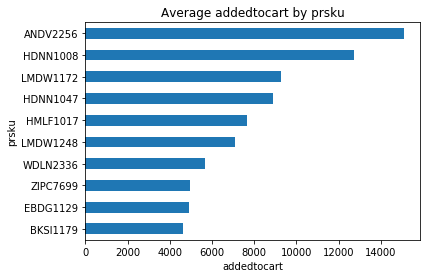

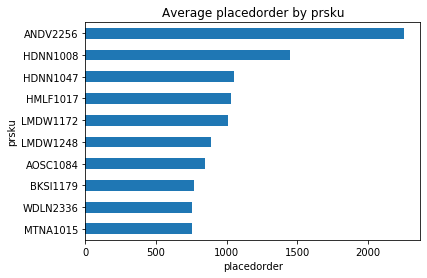

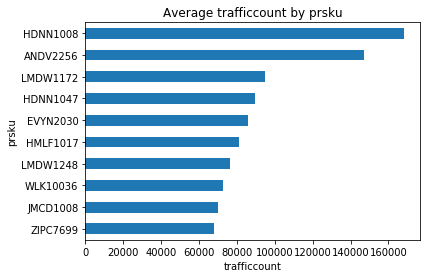

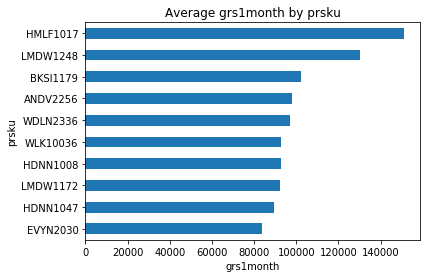

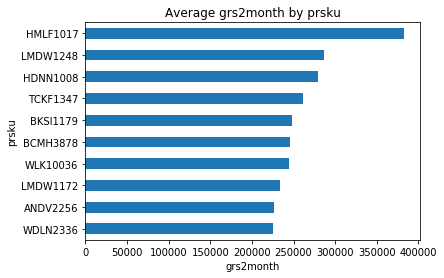

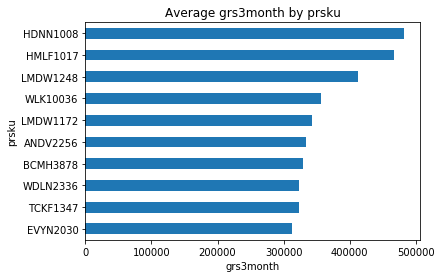

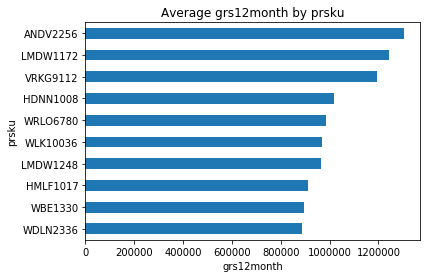

In [81]:
#remove aggregate data (suid = 1), focus on current data
df_Supplier_woagg = df_Supplier[(df_Supplier.suid != 1) & (df_Supplier.iscurrent == 1)]

#product performance
performance = ['addedtocart', 'placedorder', 'trafficcount', 'grs1month', 'grs2month', 'grs3month', 'grs12month']
gb_column = 'prsku'
for col in performance:
    df_Supplier_woagg.groupby([gb_column])[col].mean().nlargest(10).plot(kind='barh',title = "Average "+col+" by " + gb_column).invert_yaxis()
    plt.xlabel(col)
    plt.show()

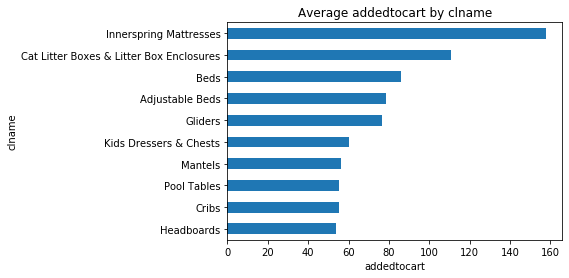

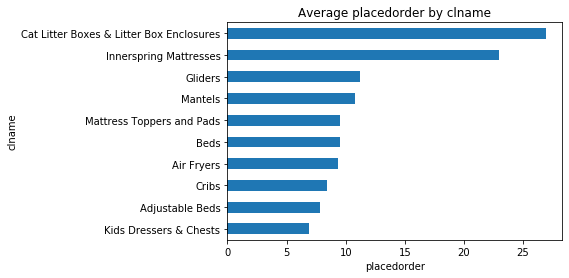

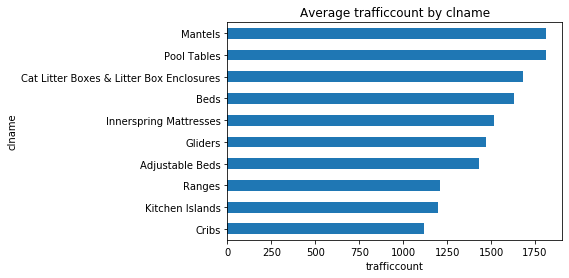

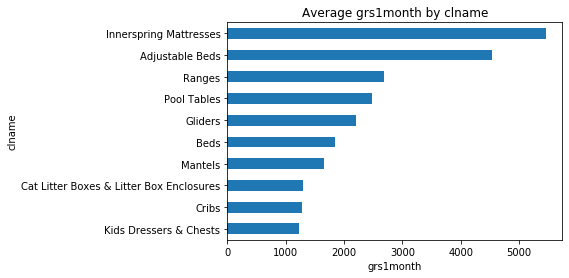

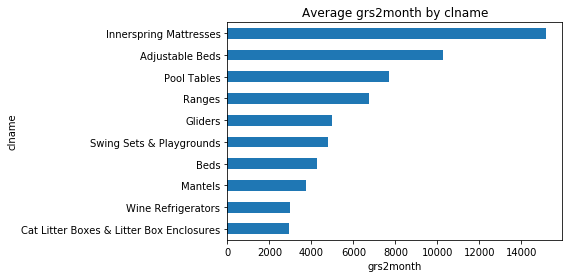

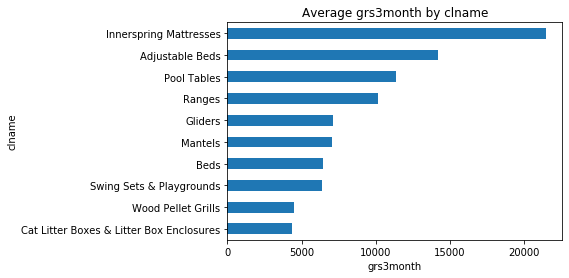

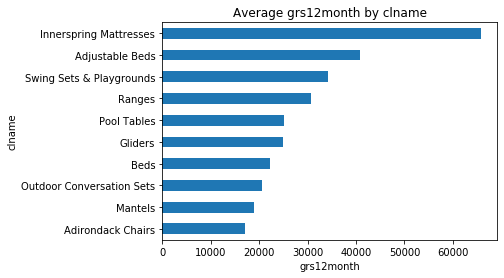

In [82]:
#class performance (mean)
performance = ['addedtocart', 'placedorder', 'trafficcount', 'grs1month', 'grs2month', 'grs3month', 'grs12month']
gb_column = 'clname'
for col in performance:
    df_Supplier_woagg.groupby([gb_column])[col].mean().nlargest(10).plot(kind='barh',title = "Average "+col+" by " + gb_column).invert_yaxis()
    plt.xlabel(col)
    plt.show()

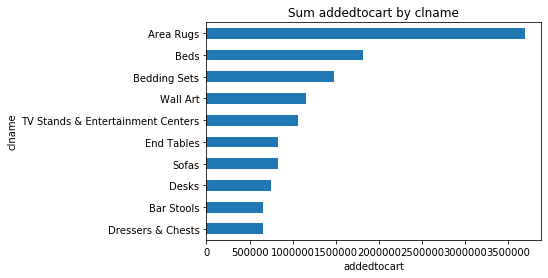

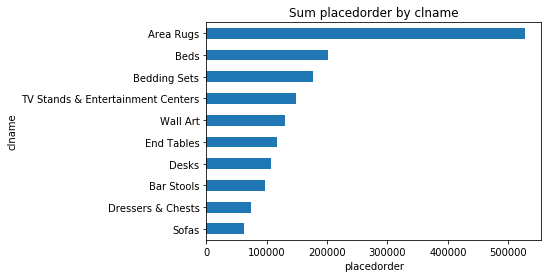

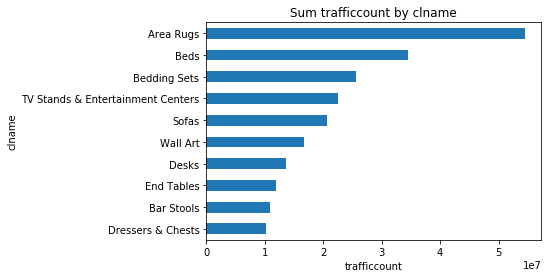

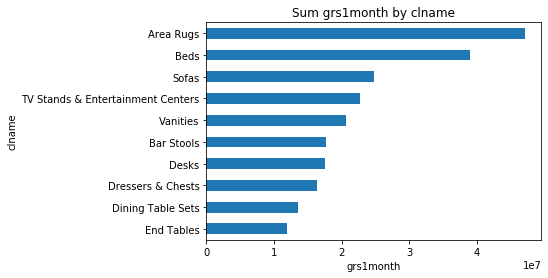

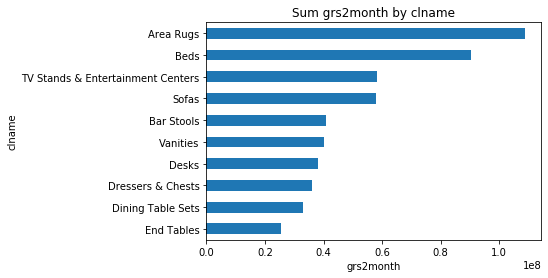

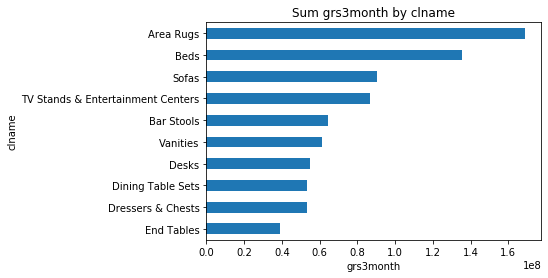

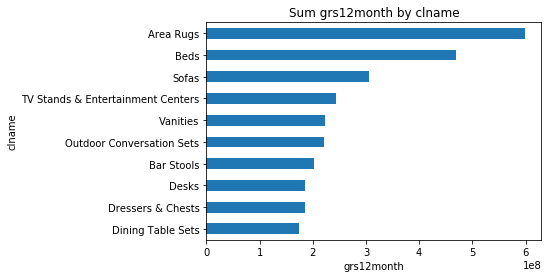

In [96]:
#product performance (sum)
performance = ['addedtocart', 'placedorder', 'trafficcount', 'grs1month', 'grs2month', 'grs3month', 'grs12month']
gb_column = 'clname'
for col in performance:
    df_Supplier_woagg.groupby([gb_column])[col].sum().nlargest(10).plot(kind='barh',title = "Sum "+col+" by " + gb_column).invert_yaxis()
    plt.xlabel(col)
    plt.show()
    

In [95]:
'''
Let's dig into class level to see their performance.

 Although Cat Litter Boxes & Litter Box Enclosures has a highest average in placedorder, but its
    standard deviation is high too
'''


df_Supplier_woagg.groupby(['clname']).agg(['mean', 'std', 'min', 'max']).sort_values(by=[('placedorder','mean'), ('addedtocart', 'mean'),( 'trafficcount','mean')], ascending=False)




soid                   clid  \
                                              mean       std min max mean   
clname                                                                      
Cat Litter Boxes & Litter Box Enclosures  3.122120  2.398290   1   7   32   
Innerspring Mattresses                    3.536990  2.684549   1   8   43   
Gliders                                   3.224049  2.473555   1   8   17   
Mantels                                   2.715385  2.381056   1   8   35   
Mattress Toppers and Pads                 3.245500  2.438644   1   8   18   
Beds                                      3.108939  2.256338   1   8    2   
Air Fryers                                2.696154  2.215723   1   8   25   
Cribs                                     3.107112  2.062425   1   8   21   
Adjustable Beds                           3.005882  2.421543   1   8   47   
Kids Dressers & Chests                    3.078449  2.322027   1   8   39   
Headboards                                3.080895  2.368618   1   8    4   
TV Stands & Entertainment Centers         3.176444  1.933163   1   8    1   
Kitchen Islands                           3.435919  2.266328   1   8    8   
Pantry Cabinets                           3.451865  1.563910   1   7   42   
Bathroom Storage                          3.365148  1.648370   1   8   37   
Desks                                     3.205907  2.170966   1   8    5   
Kids Beds                                 3.107037  1.943895   1   8   31   
Pool Tables                               2.614286  2.311218   1   6   30   
Filing Cabinets                           2.936831  2.214926   1   8    6   
Ceiling Fans                              3.083728  2.298395   1   8   16   
Bar Stools                                3.041668  2.297006   1   8    9   
Bedding Sets                              2.825443  2.445867   1   8   33   
Dressers & Chests                         3.008313  2.021084   1   8    3   
Garage Storage Cabinets                   2.537991  2.181974   1   6   36   
Accent Chests / Cabinets                  3.134211  2.580013   1   8   14   
Swing Sets & Playgrounds                  2.494361  2.065310   1   6   26   
Interior Doors                            2.839007  1.915825   1   7   44   
End Tables                                3.204481  2.303102   1   8   22   
Wine Refrigerators                        2.488290  2.149016   1   8   27   
Area Rugs                                 2.929816  2.209481   1   8   15   
Sofas                                     2.909260  2.252737   1   8   19   
Ranges                                    1.597315  1.588763   1   8   29   
Dining Table Sets                         2.748132  2.139672   1   8   12   
Vanities                                  2.772477  2.338366   1   8   13   
Gas Grills                                2.941275  1.969518   1   8   40   
Outdoor Fireplaces                        3.112357  2.227285   1   8   20   
Adirondack Chairs                         2.860324  2.438862   1   8   45   
Outdoor Conversation Sets                 2.974806  2.330302   1   8   11   
Reception Seating Chairs                  2.659671  2.058150   1   8    7   
Wood Pellet Grills                        2.039474  2.029389   1   6   48   
Smokers                                   3.208754  2.353159   1   6   28   
Chandeliers                               3.039691  2.350102   1   8   38   
Charcoal Grills                           2.752358  2.400255   1   8   46   
Patio Sofas                               2.941134  2.413037   1   8   10   
Tubs And Whirlpools                       2.260179  2.155671   1   8   24   
Classroom Storage                         2.118812  2.084511   1   6   23   
Electric Grills                           3.096970  2.322279   1   6   41   
Wall Art                                  2.341305  1.987505   1   8   34   

                                                              suid  \
                                          std mi

In [106]:
temp = pd.merge(df_Supplier_woagg, df_ContentRecomm, on='prsku', how='left', suffixes=('','_CR'))
temp.head(10)

,prsku,soid,soname,clid,clname,mkcname,suid,iswaymore,addedtocart,placedorder,trafficcount,iscurrent,videocount,grs1month,grs2month,grs3month,grs12month,weightedavgscore,percentilerank,expectedgrs,clid_CR,percentilerank_CR,biccontenttypename,hasbiccontenttype
0,AABK1087,4,Wayfair DE,18,Mattress Toppers and Pads,Mattresses - Utility Bedding,7080,0,45,5,1362,1,0,265.558272,857.66493,3759.433838,6547.578930,NaN,NaN,NaN,18,NaN,Touch & Feel,0
1,AABK1087,4,Wayfair DE,18,Mattress Toppers and Pads,Mattresses - Utility Bedding,7080,0,45,5,1362,1,0,265.558272,857.66493,3759.433838,6547.578930,NaN,NaN,NaN,18,NaN,Dimensions,0
2,AABK1087,4,Wayfair DE,18,Mattress Toppers and Pads,Mattresses - Utility Bedding,7080,0,45,5,1362,1,0,265.558272,857.66493,3759.433838,6547.578930,NaN,NaN,NaN,18,NaN,Product Feature,0
3,AABK1087,4,Wayfair DE,18,Mattress Toppers and Pads,Mattresses - Utility Bedding,7080,0,45,5,1362,1,0,265.558272,857.66493,3759.433838,6547.578930,NaN,NaN,NaN,18,NaN,Materials / How Its Made,0
4,AACF1003,3,Wayfair UK,15,Area Rugs,Rugs,4312,0,0,0,25,1,0,0.000000,0.00000,0.000000,342.437186,NaN,NaN,NaN,15,NaN,Materials / How Its Made,0
5,AACF1003,3,Wayfair UK,15,Area Rugs,Rugs,4312,0,0,0,25,1,0,0.000000,0.00000,0.000000,342.437186,NaN,NaN,NaN,15,NaN,Cleaning & Care,0
6,AACF1003,3,Wayfair UK,15,Area Rugs,Rugs,4312,0,0,0,25,1,0,0.000000,0.00000,0.000000,342.437186,NaN,NaN,NaN,15,NaN,Relative Size & Fit,0
7,AACF1003,3,Wayfair UK,15,Area Rugs,Rugs,4312,0,0,0,25,1,0,0.000000,0.00000,0.000000,342.437186,NaN,NaN,NaN,15,NaN,Warranty & Guarantees,0
8,AACF1309,3,Wayfair UK,15,Area Rugs,Rugs,4905,0,0,0,1,1,0,0.000000,0.00000,0.000000,50.585934,NaN,NaN,NaN,15,NaN,Cleaning & Care,0
9,AACF1309,3,Wayfair UK,15,Area Rugs,Rugs,4905,0,0,0,1,1,0,0.000000,0.00000,0.000000,50.585934,NaN,NaN,NaN,15,NaN,Relative Size & Fit,0


In [107]:
'''all current product has recommand content

'''
temp[temp['clid_CR'].isnull()].head()

,prsku,soid,soname,clid,clname,mkcname,suid,iswaymore,addedtocart,placedorder,trafficcount,iscurrent,videocount,grs1month,grs2month,grs3month,grs12month,weightedavgscore,percentilerank,expectedgrs,clid_CR,percentilerank_CR,biccontenttypename,hasbiccontenttype


In [111]:
df_Supplier_woagg['prsku'].describe()

count       921001
unique      548658
top       MITN4124
freq            17
Name: prsku, dtype: object

In [110]:
df_ContentRecomm['prsku'].describe()

count      7652996
unique     1913249
top       EUCT4964
freq             4
Name: prsku, dtype: object

In [113]:
df_Supplier['iscurrent'] = df_Supplier['iscurrent'].astype('object')
df_Supplier['iscurrent'].describe()

count     9358854
unique          2
top             1
freq      4693974
Name: iscurrent, dtype: int64

In [116]:
df_Supplier['suid'].describe()

count     9358854
unique       6169
top             1
freq      7506622
Name: suid, dtype: int64

In [117]:
'''
Let's check if the product which has waymore content(iswaymore=1) and also
use the recommended content type (hasbiccontenttype=1)

What's their performance in contract to those who didn't use waymore content or 
use waymore content but not use recommended content type 

result: use waymore would lead better sales. use the recommand content doesn't have positive effect toward sales.
'''

[temp[(temp['iswaymore']==1)&(temp['hasbiccontenttype']==1)]['placedorder'].mean(),
temp[(temp['iswaymore']==1)&(temp['hasbiccontenttype']==0)]['placedorder'].mean(),
temp[(temp['iswaymore']==0)&(temp['hasbiccontenttype']==0)]['placedorder'].mean()]

[4.214054867180369, 4.69947214840667, 1.8529255455022562]

,prsku,soid,soname,clid,clname,mkcname,suid,iswaymore,addedtocart,placedorder,trafficcount,iscurrent,videocount,grs1month,grs2month,grs3month,grs12month,weightedavgscore,percentilerank,expectedgrs,clid_CR,percentilerank_CR,biccontenttypename,hasbiccontenttype
45,AADZ1368,1,Wayfair,15,Area Rugs,Rugs,2103,1,1,0,114,1,0,0.000000,2105.571894,2105.571894,7851.547682,1.22,0.79,807.8266,15,0.79,Warranty & Guarantees,0
47,AADZ1368,1,Wayfair,15,Area Rugs,Rugs,2103,1,1,0,114,1,0,0.000000,2105.571894,2105.571894,7851.547682,1.22,0.79,807.8266,15,0.79,Relative Size & Fit,0
173,AAJD1194,4,Wayfair DE,9,Bar Stools,Furniture - Kitchen and Dining,8935,1,17,3,718,1,0,0.000000,0.000000,25.691704,55.698572,NaN,NaN,NaN,9,0.95,What's In the Box,0
174,AAJD1194,4,Wayfair DE,9,Bar Stools,Furniture - Kitchen and Dining,8935,1,17,3,718,1,0,0.000000,0.000000,25.691704,55.698572,NaN,NaN,NaN,9,0.95,Materials / How Its Made,0
175,AAJD1194,4,Wayfair DE,9,Bar Stools,Furniture - Kitchen and Dining,8935,1,17,3,718,1,0,0.000000,0.000000,25.691704,55.698572,NaN,NaN,NaN,9,0.95,Dimensions,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3683931,ZPCD7018,1,Wayfair,15,Area Rugs,Rugs,4878,1,4,0,75,1,0,0.000000,103.948600,398.027000,4559.753898,1.27,0.86,466.2154,15,0.86,Warranty & Guarantees,0
3683932,ZPCD7041,1,Wayfair,34,Wall Art,Wall Art,3107,1,928,128,8397,1,0,8934.116636,22544.179048,28005.917542,72229.213942,1.69,0.99,82348.3052,34,0.99,Dimensions,0
3683933,ZPCD7041,1,Wayfair,34,Wall Art,Wall Art,3107,1,928,128,8397,1,0,8934.116636,22544.179048,28005.917542,72229.213942,1.69,0.99,82348.3052,34,0.99,Visual Details,0
3683935,ZPCD7041,1,Wayfair,34,Wall Art,Wall Art,3107,1,928,128,8397,1,0,8934.116636,22544.179048,28005.917542,72229.213942,1.69,0.99,82348.3052,34,0.99,Relative Size & Fit,0
